<a href="https://colab.research.google.com/github/dananjayakumar/Ic-engine/blob/main/Unsupervised_Learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### CONTEXT:
<font color=green> The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5  continuous attributes</font>

# <font color=purple> 1.Data Understanding & Exploration:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.cluster import KMeans
from scipy.stats import zscore # for reducing the data to same scale
from sklearn.decomposition import PCA

 ### <font color=red>A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. </font>

In [ ]:
Car_name=pd.read_csv("Car name.csv")

In [ ]:
Car_name.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [ ]:
Car_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [ ]:
Car_name.describe()

,car_name
count,398
unique,305
top,ford pinto
freq,6


 ### <font color=red>B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. </font>

In [ ]:
car_atr=pd.read_json("Car-Attributes.json")

In [ ]:
car_atr.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
car_atr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
car_atr.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


 ### <font color=red>C. Merge both the DataFrames together to form a single DataFrame </font>

In [ ]:
### Merging two data to form a single file using cancatination
car= pd.concat([Car_name,car_atr],axis=1)
#car.to_csv("car.csv")

In [ ]:
car.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
car.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

 ### <font color=red>D. Print 5 point summary of the numerical features and share insights. </font>

In [ ]:
#5 point summary of the numerical features printed using describe function
car.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### Insights of 5 point summary:
Above table shows 5 point summary mean,median(50%),1st quartile(25%),3rd quartile(75%),min,max.

Average milage is 23mpg and min milage is 9mpg and max milage is 47mpg

50% vehicles are of 4 cylinders.

model years are between 70 to 82 yrs

acceleration varies between 8 to 24.8

Hourse power misiing and it is considered to be object and has to be changed to float.

# <font color=purple>2. Data Preparation & Analysis:

 ### <font color=red>A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.</font>

In [ ]:
#Dropping null values of hp
car=car.dropna()

In [ ]:
car.isna().sum()/len(car)*100

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

##### Observation: There is No null values

 ### <font color=red>B. Check for duplicate values in the data and impute with the best suitable approach.</font>

In [ ]:
car.duplicated().sum()

0

In [ ]:
result= pd.DataFrame(car)
new_output = result[result.duplicated()]
print("Duplicated values",new_output)

Duplicated values Empty DataFrame
Columns: [car_name, mpg, cyl, disp, hp, wt, acc, yr, origin]
Index: []


#### Summary:    There are no duplicate rows

 ### <font color=red>C. Plot a pairplot for all features. </font>

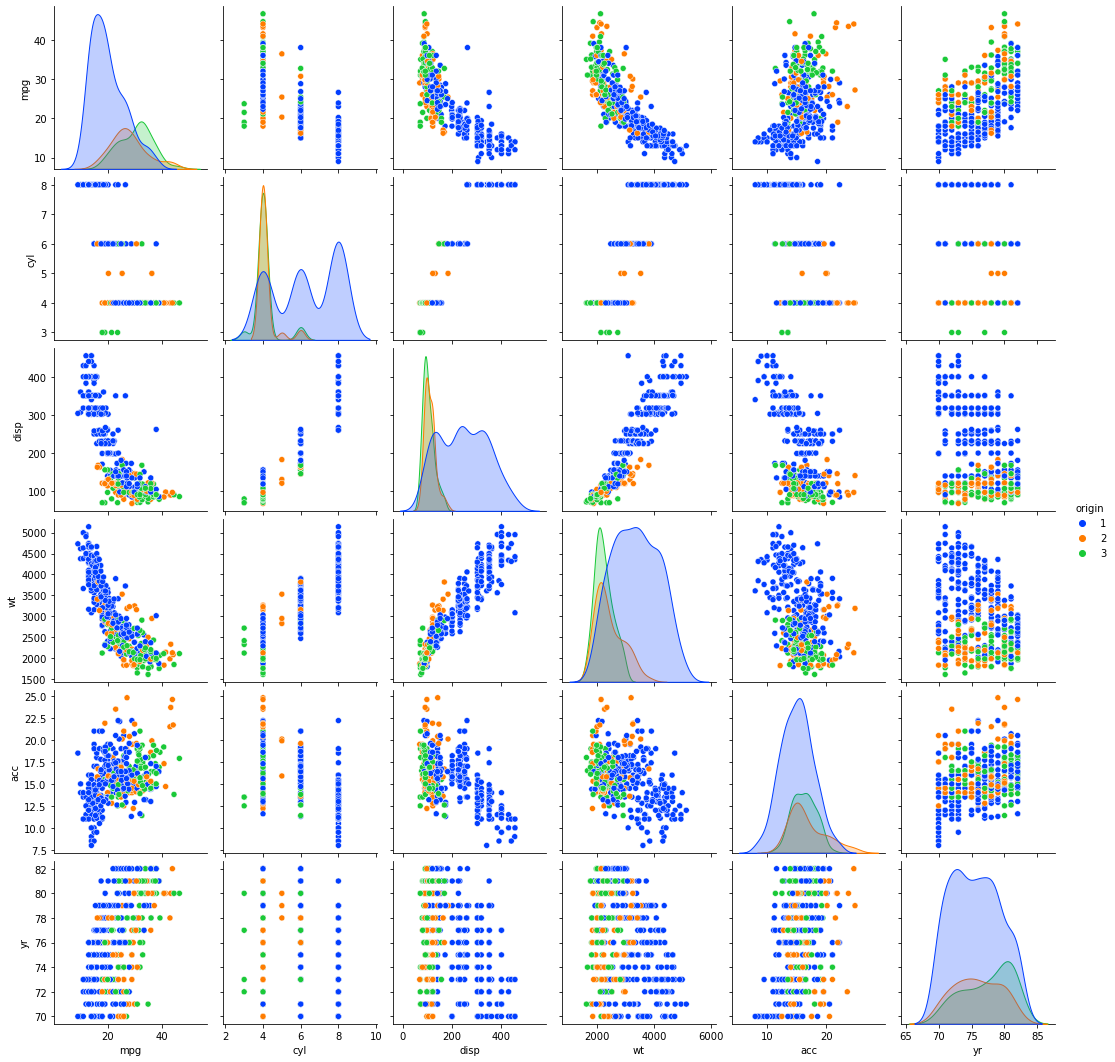

In [ ]:
sns.pairplot(car,diag_kind="kde",hue="origin",palette="bright");

## Inference:
### The Origin=1 is dominating in the data set.

### The Peaks of KDE of cylinders shows there are 3 clusters preferable for K-Means

### <font color=red>D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. </font>

Text(0.5, 1.0, 'Weight Vs Displacement')

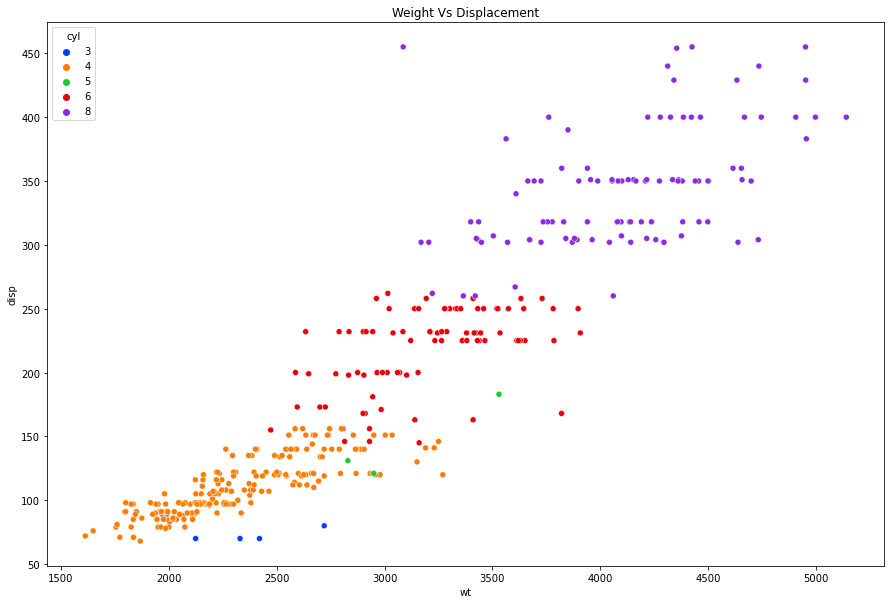

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=car['wt'],y=car['disp'],hue=car['cyl'],palette="bright");
plt.title("Weight Vs Displacement")

### <font color=red>E. Share insights for Q2.d.

## <font color=green>Inference:
### As the wieght increases there is increase in displacement

### The number of cylinders are incresed for higher weights

### Only 4  cars available with 3 cylnders

### Only 3 cars with 5 cylinders

### 4,6,8 cylinders are most common used in cars

## <font color=blue>Therefore we can clearly use 3 clusters for 4,6,8 cylinders


    **************************************************************

### <font color=red> F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’

Text(0.5, 1.0, 'Weight Vs Miles per Gallon')

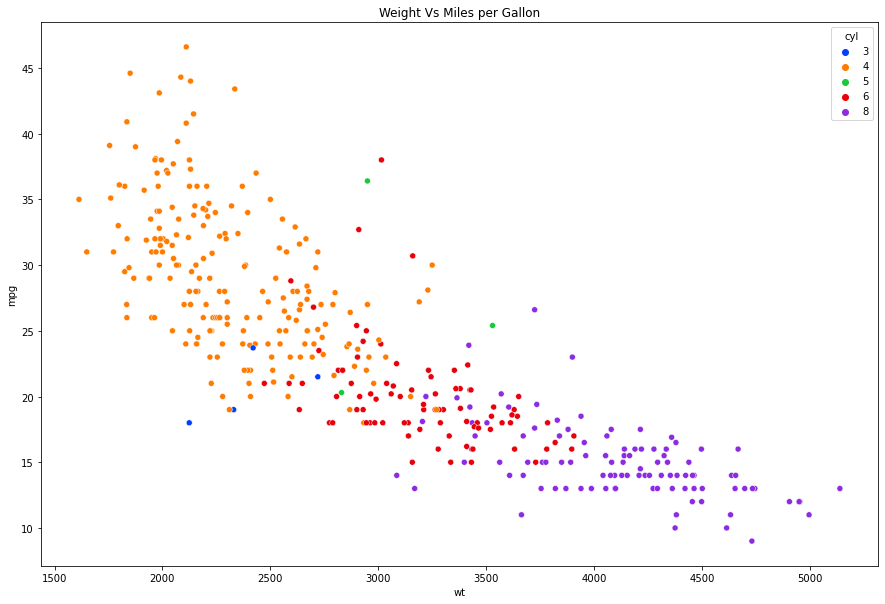

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=car['wt'],y=car['mpg'],hue=car['cyl'],palette="bright");
plt.title("Weight Vs Miles per Gallon")

## <font color=blue> Insights

### <font color=green>It is clear from scatter plot that as 'wt' increases the 'mpg' decreases

### <font color=green>Also as the 'wt' increses number of'cyl' also increses

### <font color=green>For less 'wt' 4 cylinder engine is common used and for higher 'wt' 8 cylingers are used

### <font color=red>  Check for unexpected values in all the features and datapoints with such values.

In [ ]:
 mis_hp = pd.DataFrame(car.hp.str.isdigit())
mis_hp[mis_hp['hp'] == False] #shows a non numeric data in hp column

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [ ]:
car = car.replace('?', np.nan)

In [ ]:
car.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

##### Observation: There are 6 null values available in hp and it has to be dropped

In [ ]:
#Dropping null values of hp
car=car.dropna()

In [ ]:
car.isna().sum()/len(car)*100

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

# <font color=purple>  3. Clustering:

### <font color=red> A. Apply K-Means clustering for 2 to 10 clusters.

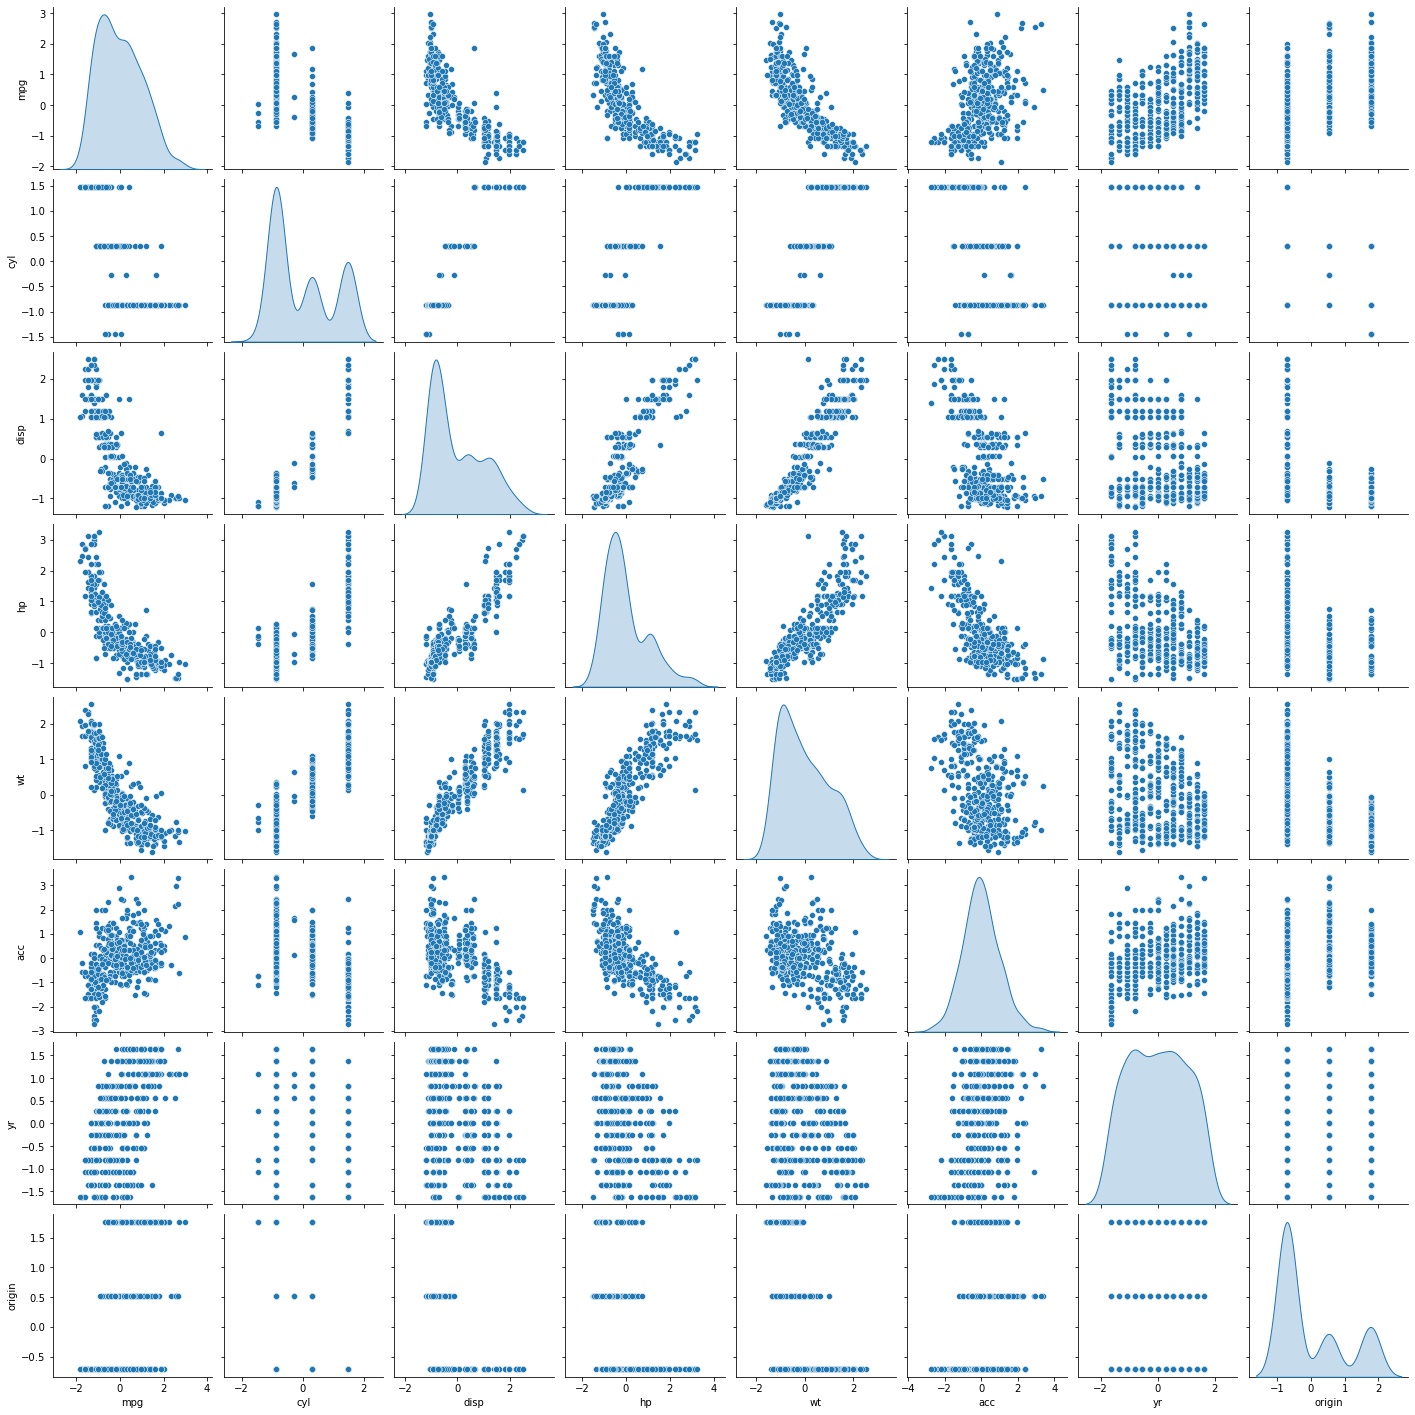

In [ ]:
#  Reducing the data to same scale  and analysing no. of clusters by using pair plot
carAttr=car.iloc[:,1:]
carScaled=carAttr.apply(zscore)
sns.pairplot(carScaled,diag_kind='kde');

### Insights from pair plot:
#### Once again cylinders and origin suggests to select 3 clusters as there are 3 peaks

## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

In [ ]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(carScaled)
    prediction=model.predict(carScaled)
    meanDistortions.append(sum(np.min(cdist(carScaled, model.cluster_centers_, 'euclidean'), axis=1)) / carScaled.shape[0])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

### <font color=red > B. Plot a visual and find elbow point.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

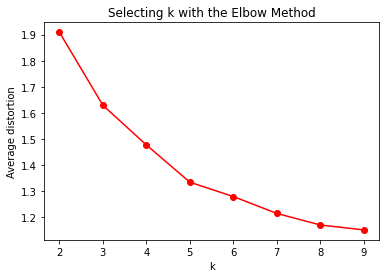

In [ ]:
plt.plot(clusters, meanDistortions,color='red', marker='o');
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### There are 3 visual elbow at k=3, k=5 and k=7

## <font color=red > C. On the above visual, highlight which are the possible Elbow points.

C:\Users\asus\AppData\Local\Temp\ipykernel_15576\902548104.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x, y,'go', linewidth=2, markersize=12,color='red')


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

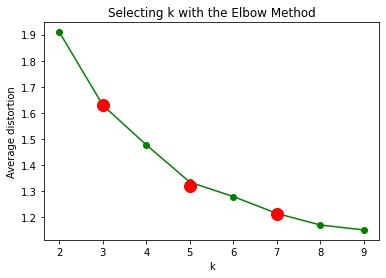

In [ ]:

plt.plot(clusters, meanDistortions,color='green', marker='o');
plt.xlabel('k')
x=3,5,7
y=1.63,1.32,1.21
plt.plot(x, y,'go', linewidth=2, markersize=12,color='red')
#plt.annotate('elbow',xy)
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

## <font color=red > D. Train a K-means clustering model once again on the optimal number of clusters.

## From the above plots evident that there are 3 visual elbow at k=3, k=5 and k=7, Therefore let us find silhouette score to optimize the number of clusters

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# KMeans with K=3

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(carScaled)
labels3 = k_means.labels_

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
# Calculating silhouette_score
print("\033[1m Silhouette Score for 3 cluster is : ",silhouette_score(carScaled,labels3))

 Silhouette Score for 3 cluster is :  0.3245045951380211


# KMeans with K=5

In [ ]:
k_means = KMeans(n_clusters = 5)
k_means.fit(carScaled)
labels5 = k_means.labels_
print("\033[1m Silhouette Score for 5 cluster is : ",silhouette_score(carScaled,labels5))

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


 Silhouette Score for 5 cluster is :  0.3339214769609638


# KMeans with K=7

In [ ]:
k_means = KMeans(n_clusters = 7)
k_means.fit(carScaled)
labels7 = k_means.labels_
print("\033[1m Silhouette Score for 7 cluster is : ",silhouette_score(carScaled,labels7))

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


 Silhouette Score for 7 cluster is :  0.2936137349833749


### <font color=green> Silhouette Score is better for 5 clusters than for 3 & 7 clusters. So, final clusters will be 5


### <font color=red> E. Add a new feature in the DataFrame which will have labels based upon cluster value.
### <font color=green> Appending Clusters to the original dataset

In [ ]:
car["Clus_kmeans5"] = labels5
car.head(25)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Clus_kmeans5
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,2
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,2
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,2
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,2
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,2
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,2
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,2
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,2
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,2
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,1,2


### <font color=red> F. Plot a visual and color the datapoints based upon clusters.

In [ ]:
car.columns

Index(['car_name', 'mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin',
       'Clus_kmeans5'],
      dtype='object')

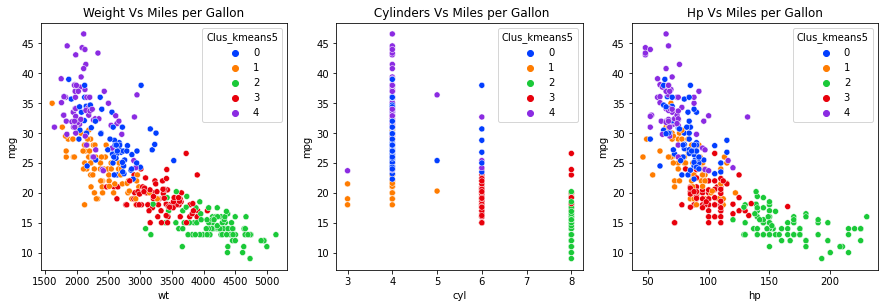

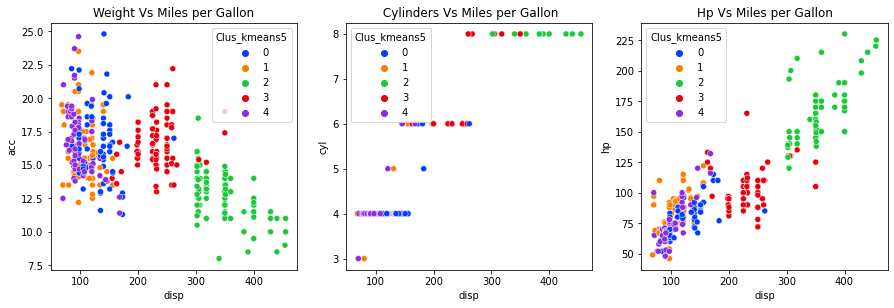

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
plt.title("Weight Vs Miles per Gallon")
sns.scatterplot(x=car['wt'],y=car['mpg'],hue=car["Clus_kmeans5"],palette="bright");


# subplot 2
plt.subplot(2, 3, 2)
plt.title(" Cylinders Vs Miles per Gallon")
sns.scatterplot(x=car['cyl'],y=car['mpg'],hue=car["Clus_kmeans5"],palette="bright");


# subplot 3
plt.subplot(2, 3, 3)
plt.title("Hp Vs Miles per Gallon")
sns.scatterplot(x=car['hp'],y=car['mpg'],hue=car["Clus_kmeans5"],palette="bright",color='blue');

# subplot 4
plt.figure(figsize=(15,10))
plt.subplot(234)
plt.title("Weight Vs Miles per Gallon")
sns.scatterplot(x=car['disp'],y=car['acc'],hue=car["Clus_kmeans5"],palette="bright");


# subplot 5
plt.subplot(235)
plt.title(" Cylinders Vs Miles per Gallon")
sns.scatterplot(x=car['disp'],y=car['cyl'],hue=car["Clus_kmeans5"],palette="bright");


# subplot 6
plt.subplot(236)
plt.title("Hp Vs Miles per Gallon")
sns.scatterplot(x=car['disp'],y=car['hp'],hue=car["Clus_kmeans5"],palette="bright",color='blue');


## Insights: The following obeservations are made from above plots for each clusters

### <font color=red> Cluster 0:

    4 cylnders

    In terms of mpg  this clusters falls top 2nd after cluster 3

    hp and displacement is slighty better than cluster 3


### <font color=red> Cluster 1:

    6-8 cylinders included with 6 cylender are more often

    wt is around 2500 to 4000

    hp is aound 75 to 150

    displacememt is between 200 to 300

    acc is between 12.5 to 22.5

### <font color=red> Cluster 2:

    Highest wt, hp, disp

    lowest mpg

    8 cylinders


### <font color=red> Cluster 3:

    4 cylinders

    highest mpg

    lowest hp and disp and wt

### <font color=red> Cluster 4:
    3 and 4 cylinders

    mpg is in medium range

    least hp and disp

### <font color=red>  G. Pass a new DataPoint and predict which cluster it belongs to.

In [ ]:
car_sample=pd.read_csv("car_sample.csv")
car_sample_Attr=car_sample.iloc[:,1:]
car_sample_scaled=car_sample_Attr.apply(zscore)

In [ ]:
car_sample

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,yaj motors,28,4,100,130,2123,14.0,71,1
1,Chai ya,15,8,400,150,2074,19.5,71,1
2,Yajju,14,8,455,225,2065,14.5,71,1
3,YMW,24,4,113,95,2372,15.0,70,3
4,Ysuzu,13,8,400,175,5140,15.5,70,1
5,hondY,18,6,258,110,2962,15.5,70,1
6,YATA,22,4,140,72,2408,16.0,70,1
7,Yenz,27,4,97,88,2130,14.5,70,3
8,Yudi,26,4,97,46,1835,20.5,70,2


In [ ]:
car_sample_scaled

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,1.300520,-0.848875,-0.903227,0.168013,-0.464196,-0.972761,1.414214,-0.668153
1,-1.040416,1.333946,1.199112,0.550827,-0.515348,1.561538,1.414214,-0.668153
2,-1.220488,1.333946,1.584541,1.986380,-0.524744,-0.742371,1.414214,-0.668153
3,0.580232,-0.848875,-0.812126,-0.501912,-0.204260,-0.511980,-0.707107,1.737198
4,-1.400560,1.333946,1.199112,1.029345,2.685309,-0.281589,-0.707107,-0.668153
5,-0.500200,0.242536,0.204005,-0.214801,0.411652,-0.281589,-0.707107,-0.668153
6,0.220088,-0.848875,-0.622915,-0.942148,-0.166679,-0.051198,-0.707107,-0.668153
7,1.120448,-0.848875,-0.924251,-0.635897,-0.456889,-0.742371,-0.707107,1.737198
8,0.940376,-0.848875,-0.924251,-1.439806,-0.764845,2.022320,-0.707107,0.534522


In [ ]:
k_means = KMeans(n_clusters = 5)
k_means.fit(car_sample_scaled)
sample_labels = k_means.labels_
car_sample["Predicted Cluster "] = sample_labels
car_sample

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Predicted Cluster
0,yaj motors,28,4,100,130,2123,14.0,71,1,4
1,Chai ya,15,8,400,150,2074,19.5,71,1,1
2,Yajju,14,8,455,225,2065,14.5,71,1,1
3,YMW,24,4,113,95,2372,15.0,70,3,0
4,Ysuzu,13,8,400,175,5140,15.5,70,1,2
5,hondY,18,6,258,110,2962,15.5,70,1,4
6,YATA,22,4,140,72,2408,16.0,70,1,4
7,Yenz,27,4,97,88,2130,14.5,70,3,0
8,Yudi,26,4,97,46,1835,20.5,70,2,3


# <font color=blue> Part B

##### CONTEXT:
<font color=green> The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles</font>

# <font color=purple>  1. Data Understanding & Cleaning:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.cluster import KMeans
from scipy.stats import zscore # for reducing the data to same scale

 ### <font color=red>A. Read ‘vehicle.csv’ and save as DataFrame.  </font>

In [ ]:
veh=pd.read_csv("vehicle.csv")

In [ ]:
veh.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [ ]:
veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [ ]:
veh.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


 ### <font color=red>B. Check percentage of missing values and impute with correct approach.  </font>

In [ ]:
#percentage of missing values
(veh.isnull().sum()/veh.count())*100

compactness                    0.000000
circularity                    0.594530
distance_circularity           0.475059
radius_ratio                   0.714286
pr.axis_aspect_ratio           0.236967
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118343
elongatedness                  0.118343
pr.axis_rectangularity         0.355872
max.length_rectangularity      0.000000
scaled_variance                0.355872
scaled_variance.1              0.236967
scaled_radius_of_gyration      0.236967
scaled_radius_of_gyration.1    0.475059
skewness_about                 0.714286
skewness_about.1               0.118343
skewness_about.2               0.118343
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

### The data consists of a lot of missing values in more number of columns

### Since this is a small dataset, dropping the missing value is may not be a good option therefore we can replace with <font color= "red"> median values

In [ ]:
veh.median()

C:\Users\asus\AppData\Local\Temp\ipykernel_15576\3514109717.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  veh.median()


compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [ ]:
# since small dataset dropping the missing value is not a good option therefore we can replace with median values
median_filler=lambda x : x.fillna(x.median())
veh2=veh.iloc[:,0:-1].apply(median_filler,axis=0) # Filling median values excludeing categorical variable "class"

In [ ]:
veh2.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

### Missing value is replaced with median value

In [ ]:
# The categorical variable "class" is to be cobined to dataframe
vehicle=pd.concat([veh2,veh["class"]],axis=1)

In [ ]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

 ### <font color=red> C. Visualize a Pie-chart and print percentage of values for variable ‘class’.

Text(0.5, 1.0, 'Visualization of class attribute')

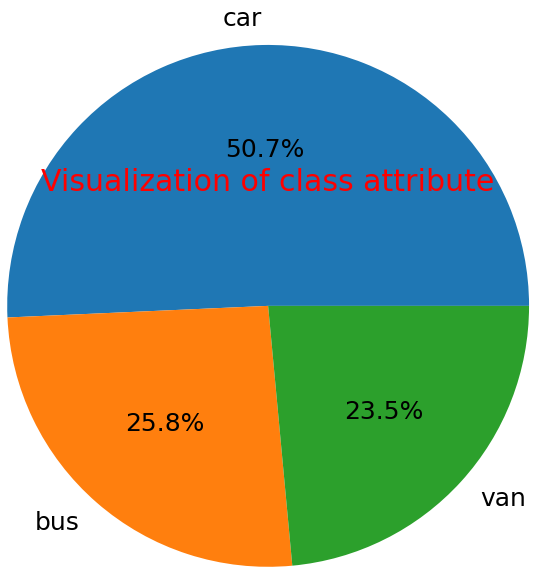

In [ ]:
plt.pie(vehicle["class"].value_counts(),labels=vehicle["class"].value_counts().index,autopct='%1.1f%%',radius=3,textprops= {'fontsize': 25});
plt.title("Visualization of class attribute",fontdict={'fontsize':30,'fontweight':4,'color': "red",'verticalalignment': 'center_baseline', 'horizontalalignment':"center"})

### The 51% data are for class car and 26%data related to bus , 23% data are of van

 ### <font color=red>D. Check for duplicate rows in the data and impute with correct approach.

In [ ]:
vehicle.duplicated().sum()

0

In [ ]:
result= pd.DataFrame(vehicle)
new_output = result[result.duplicated()]
print("Duplicated values",new_output)

Duplicated values Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []


# <font color=purple> 2. Data Preparation:

### <font color=red>  A. Split data into X and Y. [Train and Test optional]

In [ ]:
x=vehicle.drop(["class"],axis=1)
y=vehicle[["class"]]

### <font color=red>  B. Standardize the Data.

In [ ]:
xscaled=x.apply(zscore)

In [ ]:
xscaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


# <font color=purple> 3. Model Building:

### <font color=red> A. Train a base Classification model using SVM.

In [ ]:
from sklearn import svm

In [ ]:
model = svm.SVC(gamma=0.025, C=3)
model.fit(xscaled,y)
model.score(xscaled, y)
y_pred = model.predict(xscaled)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### There is 98.35% accuracy using svm model

### <font color=red>B. Print Classification metrics for train data

Accuracy score is 0.983451536643026
Recall score is 0.983451536643026


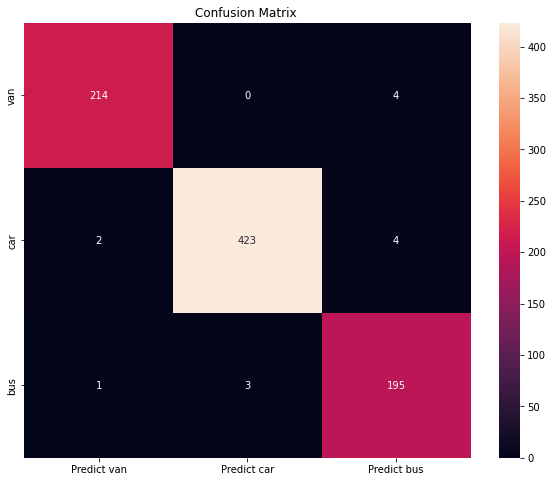

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

cm=metrics.confusion_matrix(y, y_pred)

df_cm = pd.DataFrame(cm,index = [i for i in ['van', 'car', 'bus']],
                  columns = [i for i in ["Predict van","Predict car","Predict bus"]])

plt.figure(figsize = (10,8))
plt.title("Confusion Matrix ")
sns.heatmap(df_cm, annot=True ,fmt='g')
# evaluate accuracy
print("Accuracy score is",accuracy_score(y, y_pred))
print("Recall score is",recall_score(y, y_pred,average='weighted'))

### <font color=red>C. Apply PCA on the data with 10 components.

In [ ]:
pca = PCA(n_components=10)
pca.fit(xscaled)

PCA(n_components=10)

#### The eigen Values are

In [ ]:
print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


#### The eigen Vectors

In [ ]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

#### The percentage of variation explained by each eigen Vector

In [ ]:
print(pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


### <font color=red> D. Visualize Cumulative Variance Explained with Number of Components

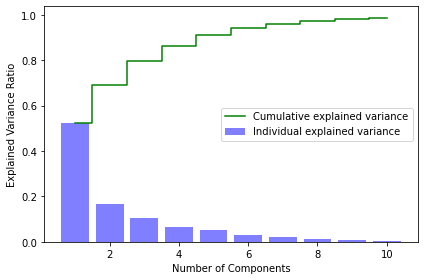

In [ ]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center',label = 'Individual explained variance',color="blue");
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid',label = 'Cumulative explained variance',color="green");
plt.ylabel('Explained Variance Ratio');
plt.xlabel('Number of Components');
plt.tight_layout();
plt.legend(loc = 'best');

### <font color=red> E. Draw a horizontal line on the above plot to highlight the threshold of 90%.

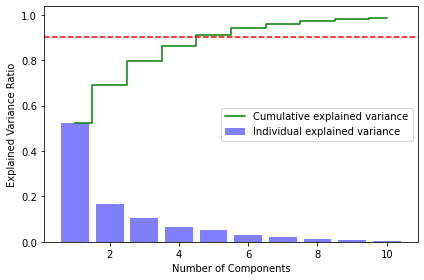

In [ ]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center',label = 'Individual explained variance',color="blue");
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid',label = 'Cumulative explained variance',color="green");
plt.ylabel('Explained Variance Ratio');
plt.xlabel('Number of Components');
plt.tight_layout();
plt.legend(loc = 'best');
plt.axhline(y=0.9, xmin=0, xmax=10, color="red",ls='--');

### <font color=red> F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

### Dimensionality Reduction

Ftom the above plot it is clear that 5 dimensions seems very reasonable. With 5 variables we can explain over 90% of the variation in the original data!

In [ ]:
pca5 = PCA(n_components=5)
pca5.fit(xscaled)
print('\033[1mThe 5 eigen Vectors are:\n\n\033[0m',pca5.components_)
print('\n\033[1mModified Explained Variance Ratio is:\n\n',pca5.explained_variance_ratio_)
Xpca5 = pca5.transform(xscaled)

The 5 eigen Vectors are:

 [[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205461e-02 -5.60143255e-02  2.75074211e-01
   6.42012965e-01  5.91801304e-01 -9.76283108e-02  5.76484382e-02
  -1.09512416e-01 -1.70641992e-02  5.63239796e-02 -1.08840729e-01
  -3.14636494e-02  2.86277015e-01 -1.15679354e-01 -7.52828902e-02
   8.73592017e-03  3.95242746e-02]
 [ 7.83843562e-02  1.87337406e-01 -7.12008422e-02 -4.26053443e-02
   3.27257

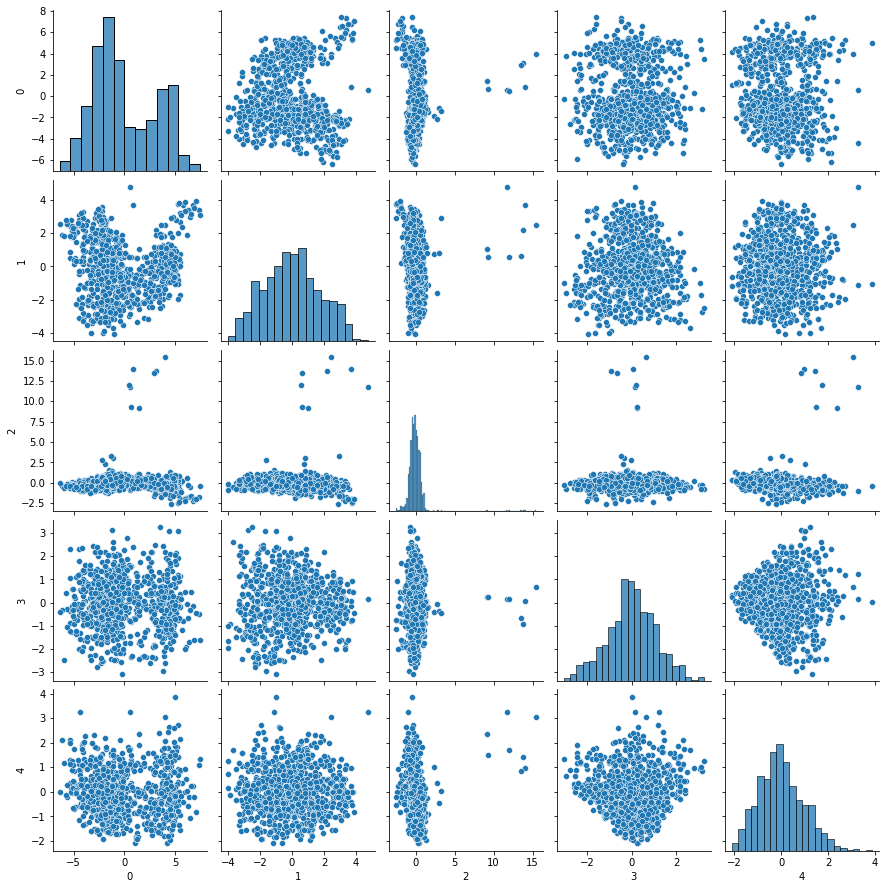

In [ ]:
sns.pairplot(pd.DataFrame(Xpca5));

### <font color=red> G. Train SVM model on components selected from above step.

In [ ]:
svm_model=svm.SVC(gamma=0.025, C=3)
svm_model.fit(xscaled,y)
svm_model.score(xscaled,y)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.983451536643026

In [ ]:
svm_model_pca=svm.SVC(gamma=0.025, C=3)
svm_model_pca.fit(Xpca5,y)
y_pred_pca=svm_model_pca.predict(Xpca5)
svm_model_pca.score(Xpca5,y)


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7789598108747045

### <font color=red> H. Print Classification metrics for train data of above model and share insights

Accuracy score of with PCA of 5 component is 0.7789598108747045
Accuracy score of without PCA is 0.983451536643026


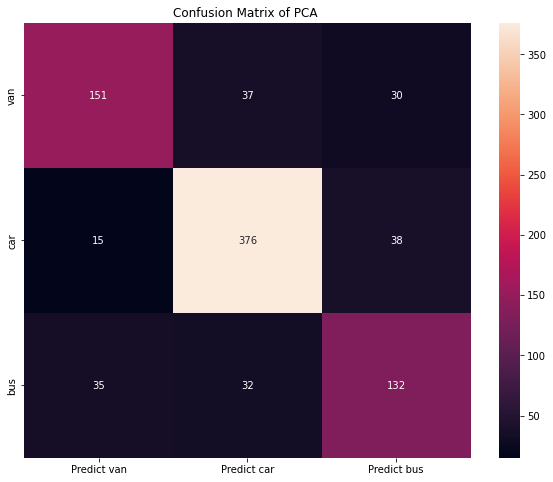

In [ ]:
cm_pca=metrics.confusion_matrix(y, y_pred_pca)

df_cm_pca = pd.DataFrame(cm_pca,index = [i for i in ['van', 'car', 'bus']],
                  columns = [i for i in ["Predict van","Predict car","Predict bus"]])

plt.figure(figsize = (10,8))
plt.title("Confusion Matrix of PCA ")
sns.heatmap(df_cm_pca, annot=True ,fmt='g')
# evaluate accuracy
print("Accuracy score of with PCA of 5 component is",accuracy_score(y, y_pred_pca))
print("Accuracy score of without PCA is",accuracy_score(y, y_pred))

##  <font color=red> Insights
#### There is a reduction of accuracy after applying the PCA with 5 components.

#### Without PCA accuracy score was 98.35% and there is a drastic decrease to 77.89% after applying reducing dimensions to 5.

#### There is decrease of 20% of score which can not be accepted and imrpovement should be done using paramenter tuning to select the best paramenters.

## <font color=purple>4. Performance Improvement:

### <font color=red>A. Train another SVM on the components out of PCA. Tune the parameters to improve performance

###  <font color= green>Tuning paramer of SVM using Grid Search:

In [ ]:
# train the model on train set
model_svm = svm.SVC()
model_svm.fit(Xpca5, y)

# print prediction results
predictions = model_svm.predict(Xpca5)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(Xpca5, y)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.568 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.550 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.729 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.692 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.734 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.680 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.509 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.509 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.509 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.506 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.509 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.509 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.509 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.509 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.509 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.509 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.771 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.781 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.799 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.746 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.759 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.793 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.822 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.852 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.763 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.671 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.716 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.722 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.728 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.686 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.509 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.509 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.509 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.509 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.509 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.509 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.775 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.746 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.771 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.834 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.811 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.870 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.822 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.740 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.763 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.769 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.692 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.618 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.651 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.686 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.704 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.609 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.515 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.509 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.509 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.775 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.805 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.751 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.799 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.822 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.817 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.753 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.840 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.793 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.846 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.763 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.694 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.710 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.722 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.751 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.686 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.606 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.657 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.675 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.692 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.615 total time=   0.0s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.769 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.805 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.751 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.771 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.781 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.781 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.817 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.822 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.852 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.817 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.694 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.734 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.763 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.769 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.686 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.629 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.686 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.704 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.722 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.621 total time=   0.0s


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

### <font color=red> B. Share best Parameters observed from above step

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


### <font color=red> C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with  insights.

In [ ]:
svm_model_pca_tuned=svm.SVC(gamma=0.1, C=10)
svm_model_pca_tuned.fit(Xpca5,y)
y_pred_pca_tuned=svm_model_pca_tuned.predict(Xpca5)
svm_model_pca_tuned.score(Xpca5,y)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8900709219858156

Accuracy score of with Tuned PCA of 5 component is 0.8900709219858156
Accuracy score of without tuning PCA  of 5 component is 0.7789598108747045


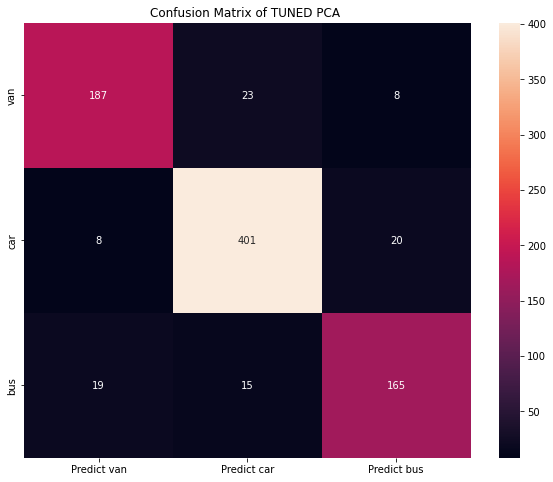

In [ ]:
cm_pca_tuned=metrics.confusion_matrix(y, y_pred_pca_tuned)

df_cm_pca_tuned = pd.DataFrame(cm_pca_tuned,index = [i for i in ['van', 'car', 'bus']],
                  columns = [i for i in ["Predict van","Predict car","Predict bus"]])

plt.figure(figsize = (10,8))
plt.title("Confusion Matrix of TUNED PCA ")
sns.heatmap(df_cm_pca_tuned, annot=True ,fmt='g')
# evaluate accuracy
print("Accuracy score of with Tuned PCA of 5 component is",accuracy_score(y, y_pred_pca_tuned))
print("Accuracy score of without tuning PCA  of 5 component is",accuracy_score(y,y_pred_pca))

##  <font color=red> Insights
#### There is a improvemnent of accuracy after TUNING paramenter of PCA with 5 components.

#### Without tuining PCA accuracy score was <font color=blue>77.89%</font> and there is a drastic increase to  <font color=blue>89%</font> after applying tuning hyperparamenters using Grid Search.

## <font color=green> There is an increase of 11% of score which can be accepted as imrpovement after using paramenter tuning by Grid Search by selecting  C=10, gamma=0.1

### <font color=purple> 5. Data Understanding & Cleaning: [5 Marks]

### <font color=red> A. Explain pre-requisite/assumptions of PCA

###  There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves. The data has more number of attributes which can be solved using PCA.

### PCA assumes that the principal component with high variance must be paid attention and the PCAs with lower variance are disregarded as noise. Pearson correlation coefficient framework led to the origin of PCA, and there it was assumed first that the axes with high variance would only be turned into principal components.

###  The feature set must be correlated and the reduced feature set after applying PCA will represent the original data set but in an effective way with fewer dimensions.

### There are 18 colums to predict "class", that is not feasible when the data size increases, therefore PCA is necessary to reduce the dimension to optimal value.



### <font color=red> B. Explain advantages and limitations of PCA

In [ ]:
vehicle.shape

(846, 19)

# Advatanges of PCA:
### Above information shows there are 18 colums to predict "class", that is not feasible when the data size increases, therefore by using PCA  dimensionis reduceg to 5 columns with good accuracy.

### PCA with optimal value made us to visualization easir,

### The curse of dimensionality was reduced by PCA with optimal value without compromising the model performance.

### PCA removes the multi collineraity to improve the model

### PCA reduces the staorge by reducing the dimensuions

### PCA reduces computational time of the model

# Limitations of PCA:
### The PCA assumes the linear relationship, but if relationship is non linear then PCA is not effective.

### Scaling is necessary for PCA But if we change the scale will change the PCA

### More number of outliers leads to errors and will degrade the model performance.